<a href="https://colab.research.google.com/github/Yashumittapalli123/AIML/blob/main/LAB_9_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path ="/loan_data.csv"
df = pd.read_csv(file_path)
df.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
print("Following is a breakup of credit approval status.\n1 means approved credits,0 means not approved.")
print (df['credit.policy'].value_counts())

Following is a breakup of credit approval status.
1 means approved credits,0 means not approved.
credit.policy
1    7710
0    1868
Name: count, dtype: int64


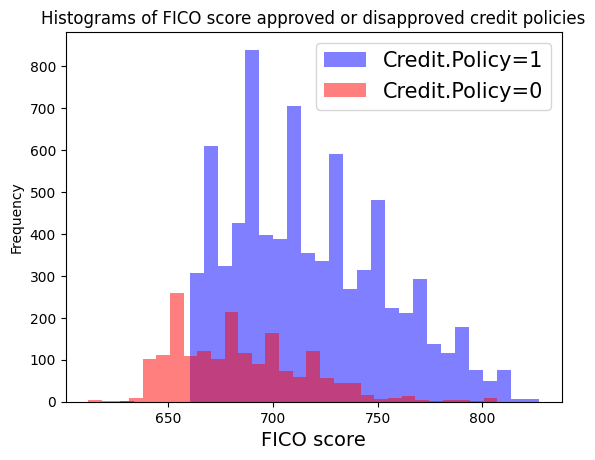

In [ ]:
df[df['credit.policy'] == 1]['fico'].plot.hist(bins=30, alpha=0.5, color='blue', label='Credit.Policy=1')
df[df['credit.policy'] == 0]['fico'].plot.hist(bins=30, alpha=0.5, color='red', label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title("Histograms of FICO score approved or disapproved credit policies")
plt.xlabel("FICO score",fontsize=14)
plt.show()

Text(0, 0.5, 'Interest rate')

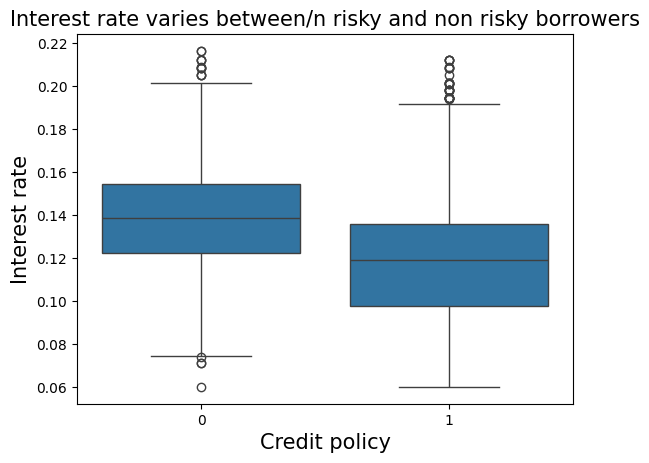

In [ ]:
sns.boxplot(x=df['credit.policy'],y=df['int.rate'])
plt.title("Interest rate varies between/n risky and non risky borrowers",fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Interest rate",fontsize=15)

Text(0, 0.5, 'Annual income')

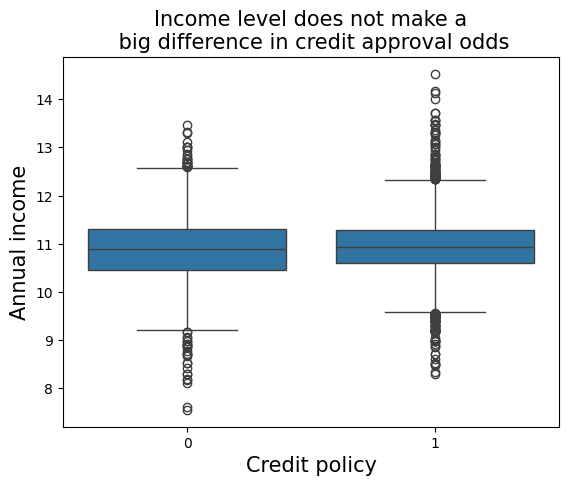

In [ ]:
sns.boxplot(x=df['credit.policy'],y=df['log.annual.inc'])
plt.title("Income level does not make a\n big difference in credit approval odds",fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Annual income",fontsize=15)

Text(0, 0.5, 'Interest rate')

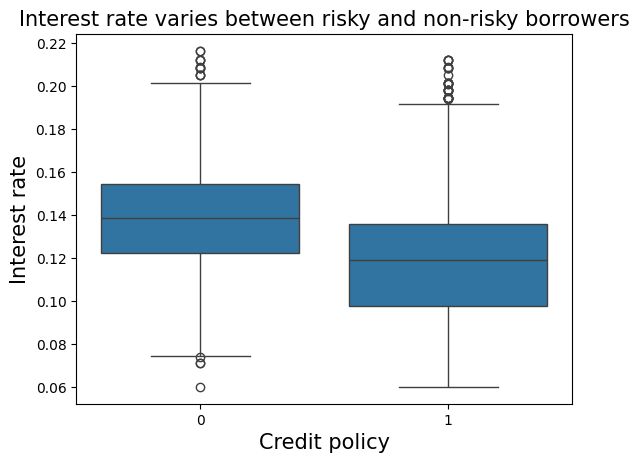

In [ ]:
sns.boxplot(x=df['credit.policy'],y=df['int.rate'])
plt.title("Interest rate varies between risky and non-risky borrowers", fontsize=15)
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Interest rate",fontsize=15)

Text(0, 0.5, 'Debt-to-income ratio')

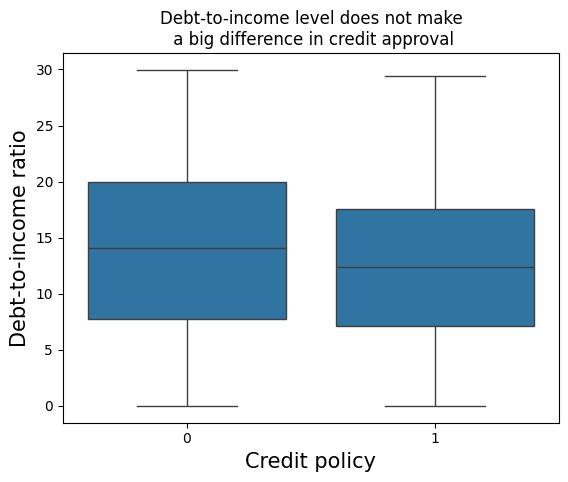

In [ ]:
sns.boxplot(x=df['credit.policy'],y=df['dti'])
plt.title("Debt-to-income level does not make\n a big difference in credit approval")
plt.xlabel("Credit policy",fontsize=15)
plt.ylabel("Debt-to-income ratio",fontsize=15)

Text(0.5, 0, 'purpose')

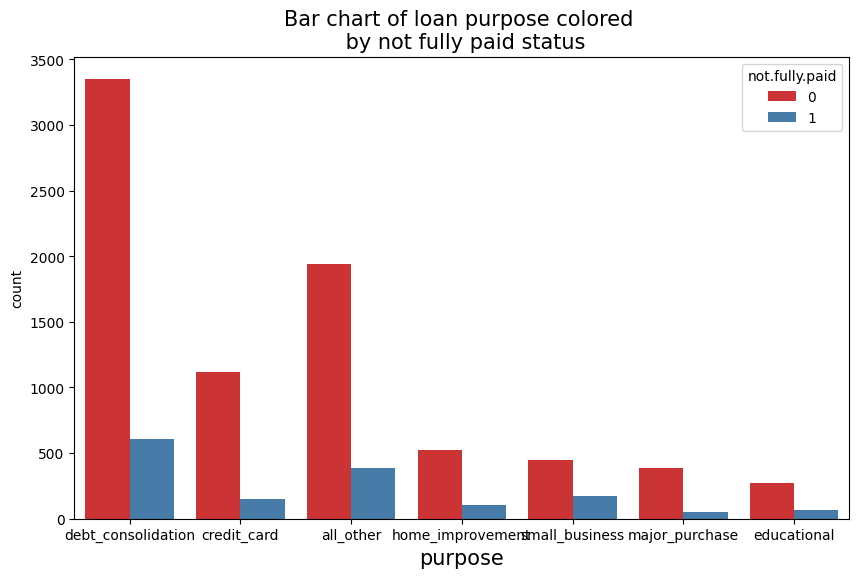

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')
plt.title("Bar chart of loan purpose colored \n by not fully paid status",fontsize=15)
plt.xlabel("purpose",fontsize=15)

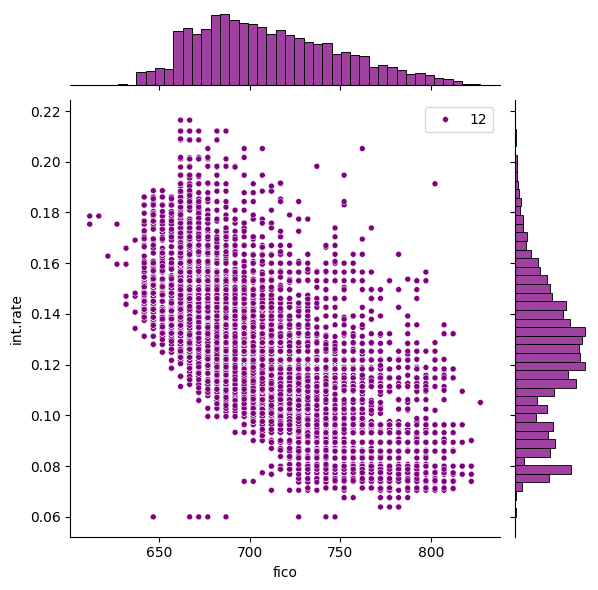

In [ ]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple',size=12)


<Figure size 1400x700 with 0 Axes>

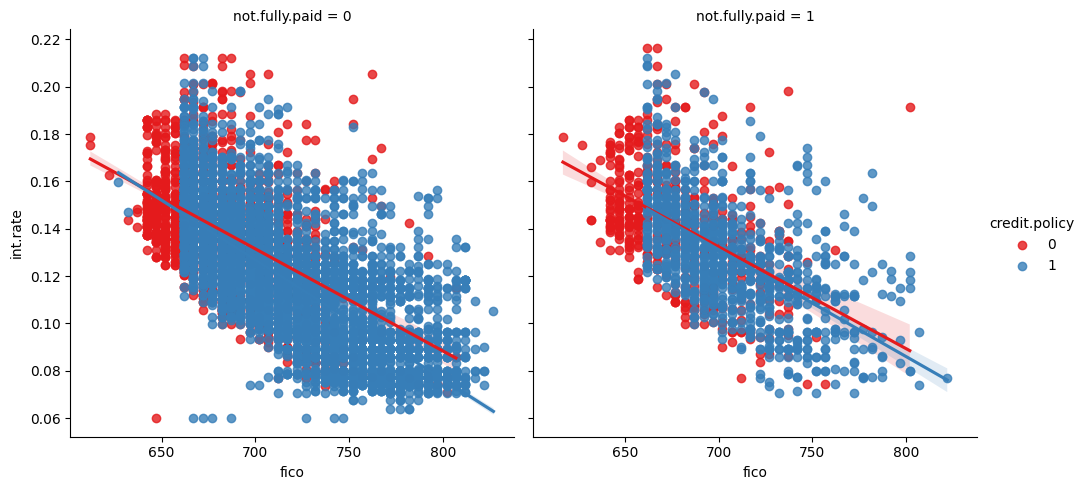

In [ ]:
plt.figure(figsize=(14,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [ ]:
df_final = pd.get_dummies(df,columns=['purpose'],drop_first=True)


In [ ]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=101)

In [ ]:
X_train.shape,y_test.shape

((9548, 18), (30,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
prediction = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.14      0.33      0.20         3

    accuracy                           0.73        30
   macro avg       0.53      0.56      0.52        30
weighted avg       0.84      0.73      0.78        30



In [ ]:
cm=confusion_matrix(y_test,prediction)
print(cm)
print("Accuracy of prediction:",
      round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[21  6]
 [ 2  1]]
Accuracy of prediction: 0.733


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [ ]:
cr = classification_report(y_test,rfc.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       0.00      0.00      0.00         3

    accuracy                           0.90        30
   macro avg       0.45      0.50      0.47        30
weighted avg       0.81      0.90      0.85        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
cm=confusion_matrix(y_test,rfc.predict(X_test))
print(cm)
print("Accuracy of prediction:",
      round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[27  0]
 [ 3  0]]
Accuracy of prediction: 0.9


In [ ]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5


Text(0, 0.5, 'Prediction accuracy from confusion matrix')

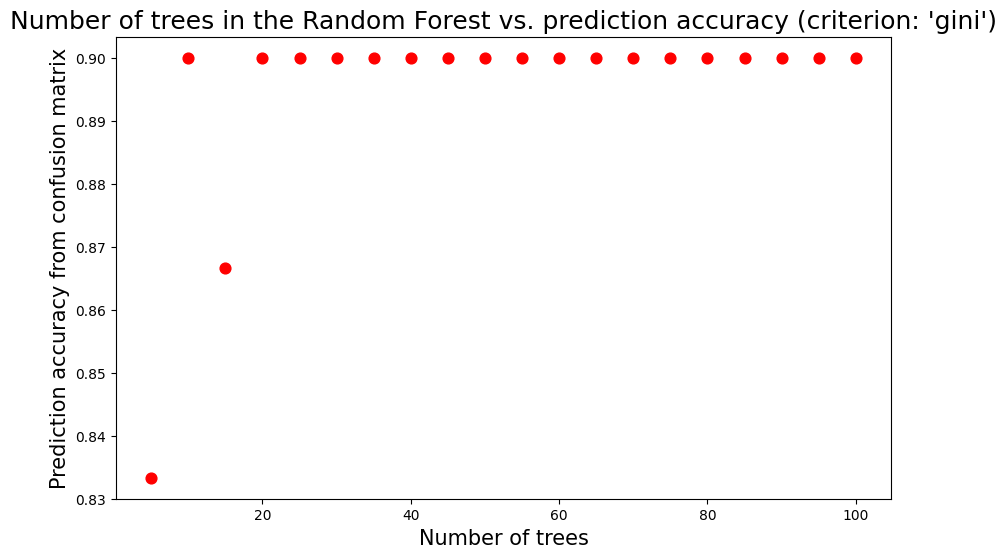

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='red')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)
